In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

Using TensorFlow backend.


In [2]:
features = ['Malignancy', 'Diameter', 'Lobulation', 'Spiculation']

In [3]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitecture.ipynb'
%run 'batchGenerator.ipynb'

In [4]:
#Compiling model with branching on the level of Dense block
model = compileModel((1,64,64,64),1e-3)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), padding="same", kernel_regularizer=<keras.reg..., data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


In [4]:
#Compiling model with branching on the level of Convolution block #5
model = compileModelDeepBranching((1,64,64,64),1e-3)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), kernel_regularizer=<keras.reg..., padding="same", data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, name="Spiculation", kernel_regularizer=<keras.reg..., activation="softplus")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [ ]:
# model_64.load_weights('/home/katya/LungCancer/Katya/CNN_v1/model_v1_weights_temp64.h5')

nbEpochs = 15

modelPath = '/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/LUNA_model_v2.h5'
model, lossHist = trainModel(model, modelPath, batchSize=50, nbEpoch = nbEpochs, stepsPerEpoch = 100)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/LUNA_model_v2_weights.h5')

Loading positive patches
The number of samples for true category constitutes 3570
Loading negative patches
The number of samples for random category constitutes 5328


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:59: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., initial_epoch=0, steps_per_epoch=100, epochs=1, callbacks=[<keras.ca..., validation_steps=20, validation_data=<generator...)`


Epoch 1/1
 85/100 [========================>.....] - ETA: 66s - loss: 1.7693 - Malignancy_loss: 0.1292 - Diameter_loss: 0.2287 - Lobulation_loss: 0.1584 - Spiculation_loss: 0.1409 

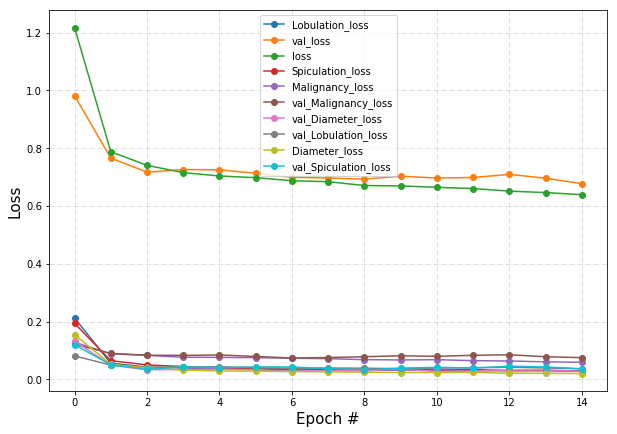

In [7]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(nbEpochs)], lossHist[key], 'o-', label=labels[i])
    plt.legend()
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v2/figures/' + str(version) + '.png')

In [6]:
version = 7

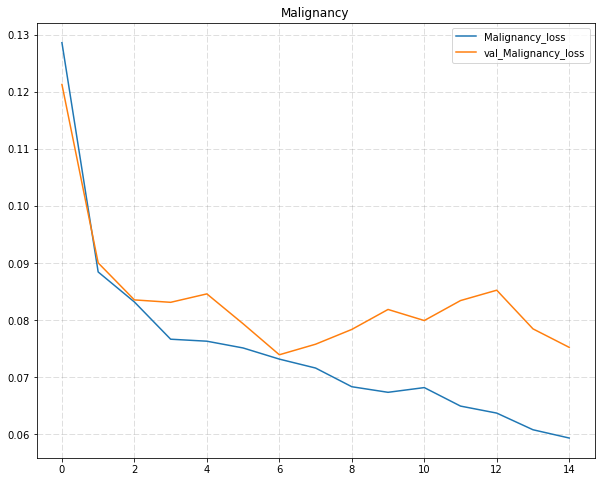

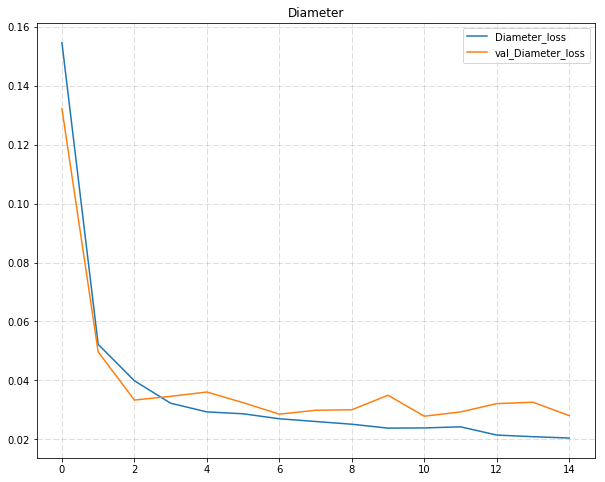

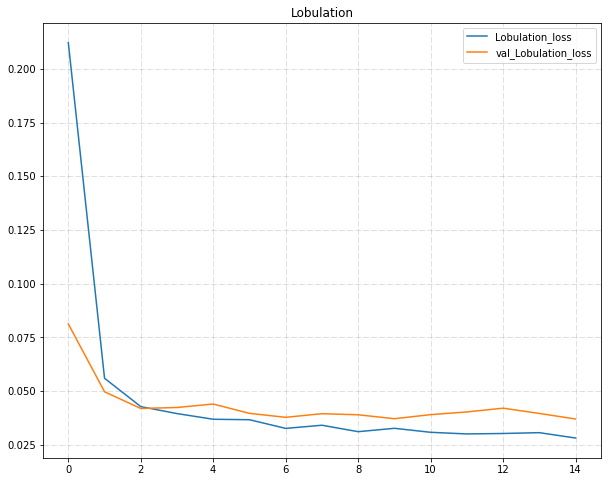

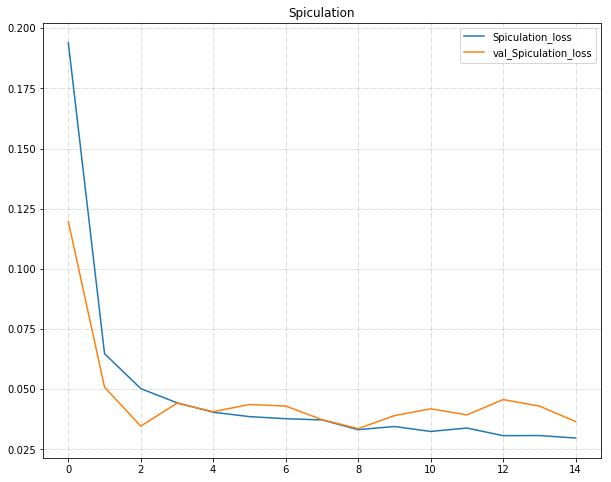

In [9]:
for feature in features:
    plt.figure(figsize=[10,8])
    plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')

    plt.plot([x for x in range(nbEpochs)], lossHist[feature+'_loss'], label=feature+'_loss')
    plt.plot([x for x in range(nbEpochs)], lossHist['val_'+feature+'_loss'], label='val_'+feature+'_loss')
    plt.title(feature)
    plt.legend()
    plt.savefig('/home/katya/LungCancer/Katya/CNN_v2/figures/'+str(version)+'.'+feature+'.png')